In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load dataset
df = pd.read_csv("A18-sonardataset.csv")
# Display first 5 rows
df.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
df.shape

(208, 61)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     208 non-null    float64
 1   x_2     208 non-null    float64
 2   x_3     208 non-null    float64
 3   x_4     208 non-null    float64
 4   x_5     208 non-null    float64
 5   x_6     208 non-null    float64
 6   x_7     208 non-null    float64
 7   x_8     208 non-null    float64
 8   x_9     208 non-null    float64
 9   x_10    208 non-null    float64
 10  x_11    208 non-null    float64
 11  x_12    208 non-null    float64
 12  x_13    208 non-null    float64
 13  x_14    208 non-null    float64
 14  x_15    208 non-null    float64
 15  x_16    208 non-null    float64
 16  x_17    208 non-null    float64
 17  x_18    208 non-null    float64
 18  x_19    208 non-null    float64
 19  x_20    208 non-null    float64
 20  x_21    208 non-null    float64
 21  x_22    208 non-null    float64
 22  x_

In [5]:
x = df.iloc[:, :-1]   # First 60 columns (features)
y = df.iloc[:, -1]    # Last column (target)

In [6]:
y.unique()

array(['R', 'M'], dtype=object)

In [7]:
# Encode M -> 1, R -> 0
# M → Mine
# R → Rock

y = y.astype(str)
y = y.map({'M': 1, 'R': 0})
y

0      0
1      0
2      0
3      0
4      0
      ..
203    1
204    1
205    1
206    1
207    1
Name: Y, Length: 208, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
x = SS.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Base ANN model
model = Sequential()
# Input + Hidden layer
model.add(Dense(32, activation='relu', input_shape=(60,)))
# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predictions
y_pred = (model.predict(x_test) > 0.5).astype(int)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("MODEL SUMMARY :",model.summary())


Epoch 1/50


/opt/anaconda3/envs/anaconda-2025.04-py3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5638 - loss: 0.7150 - val_accuracy: 0.7647 - val_loss: 0.6403
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5638 - loss: 0.7051 - val_accuracy: 0.7647 - val_loss: 0.6339
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6040 - loss: 0.6961 - val_accuracy: 0.7647 - val_loss: 0.6262
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6242 - loss: 0.6878 - val_accuracy: 0.7647 - val_loss: 0.6185
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6174 - loss: 0.6791 - val_accuracy: 0.7647 - val_loss: 0.6120
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6376 - loss: 0.6713 - val_accuracy: 0.7647 - val_loss: 0.6048
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6510 - loss: 0.6631 - val_accuracy: 0.7647 - val_loss: 0.5990
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6711 - loss: 0.6564 - val_accuracy: 0.7647 - val_loss: 0.5924
Epo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,957 (23.27 KB)

 Trainable params: 1,985 (7.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,972 (15.52 KB)

MODEL SUMMARY : None


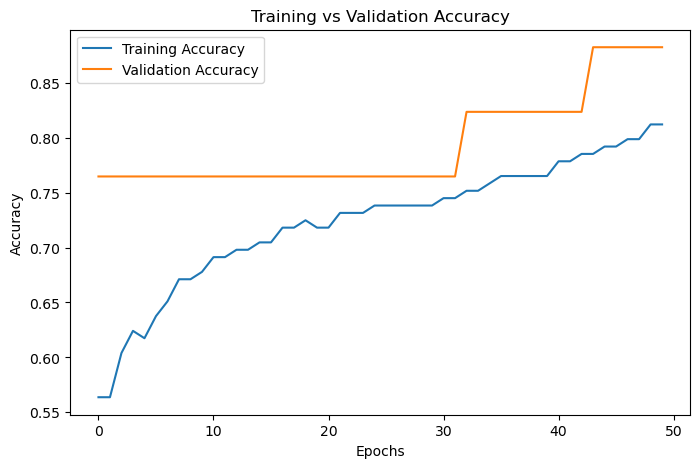

In [10]:
# Training vs Validation Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


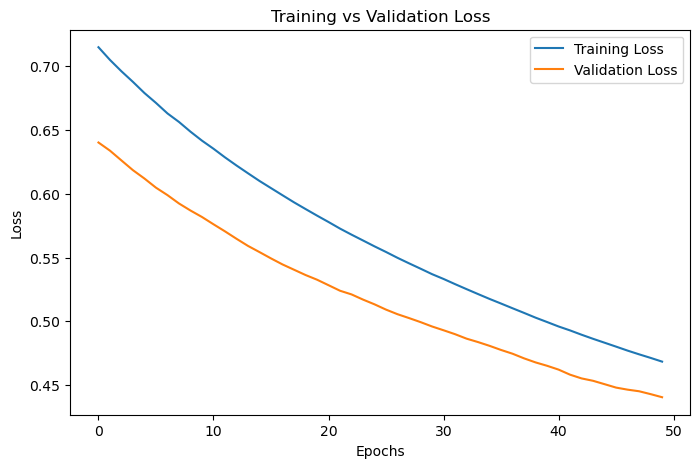

In [11]:
# Training vs Validation Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [12]:
# ReLU improves learning speed, reduces vanishing gradient problems, and works well for deep learning models.
# Sigmoid outputs values between 0 and 1, making it ideal for binary classification problems like Mine vs Rock.

In [13]:
# Tuning ANN model
# Increase neurons
# Add extra hidden layer
# Reduce learning rate

In [14]:

tuned_model = Sequential()

tuned_model.add(Dense(64, activation='relu', input_shape=(60,)))
tuned_model.add(Dense(32, activation='relu'))
tuned_model.add(Dense(1, activation='sigmoid'))

tuned_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
tuned_history = tuned_model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)
y_pred_tuned = (tuned_model.predict(x_test) > 0.5).astype(int)

tuned_acc =accuracy_score(y_test, y_pred_tuned)
print("Tuned Accuracy :", accuracy_score(y_test, y_pred_tuned))
print("Tuned Precision:", precision_score(y_test, y_pred_tuned))
print("Tuned Recall   :", recall_score(y_test, y_pred_tuned))
print("Tuned F1-score :", f1_score(y_test, y_pred_tuned))
print("MODEL SUMMARY :",tuned_model.summary())



Epoch 1/30


/opt/anaconda3/envs/anaconda-2025.04-py3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5168 - loss: 0.6968 - val_accuracy: 0.5882 - val_loss: 0.6895
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6309 - loss: 0.6198 - val_accuracy: 0.5882 - val_loss: 0.6423
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7450 - loss: 0.5658 - val_accuracy: 0.8235 - val_loss: 0.6037
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7517 - loss: 0.5288 - val_accuracy: 0.8235 - val_loss: 0.5716
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7584 - loss: 0.4962 - val_accuracy: 0.7647 - val_loss: 0.5526
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7785 - loss: 0.4672 - val_accuracy: 0.7647 - val_loss: 0.5272
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8121 - loss: 0.4413 - val_accuracy: 0.7647 - val_loss: 0.5055
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8255 - loss: 0.4168 - val_accuracy: 0.7647 - val_loss: 0.4829
Epo

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,053 (70.52 KB)

 Trainable params: 6,017 (23.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,036 (47.02 KB)

MODEL SUMMARY : None


In [15]:
# Adjusting the number of neurons, learning rate, batch size, and epochs improved model stability and predictive accuracy.

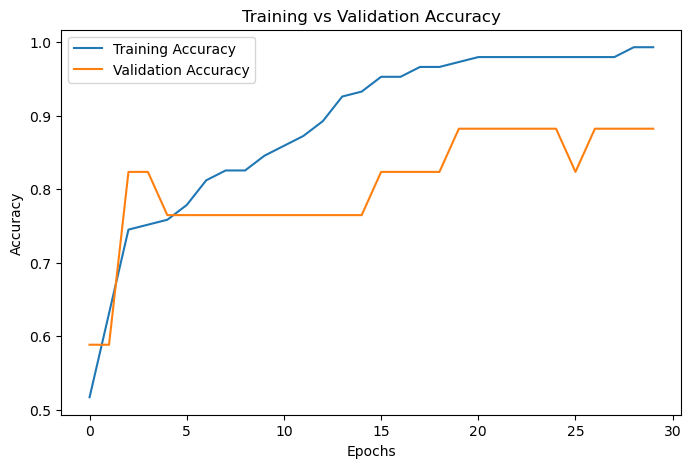

In [16]:
# Training vs Validation Accuracy
plt.figure(figsize=(8,5))
plt.plot(tuned_history.history['accuracy'], label='Training Accuracy')
plt.plot(tuned_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


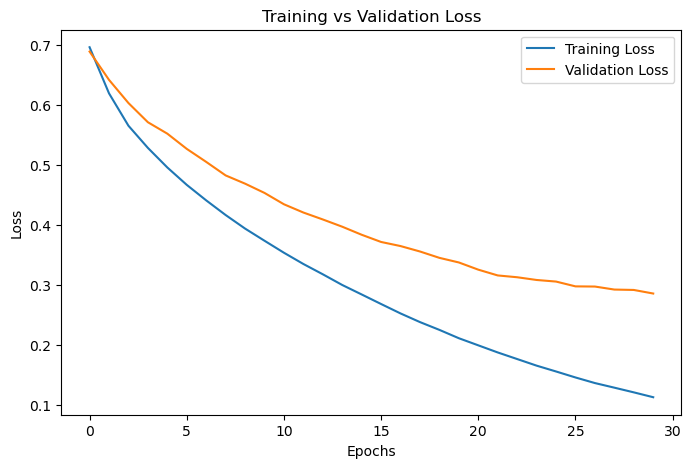

In [17]:
# Training vs Validation Loss
plt.figure(figsize=(8,5))
plt.plot(tuned_history.history['loss'], label='Training Loss')
plt.plot(tuned_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


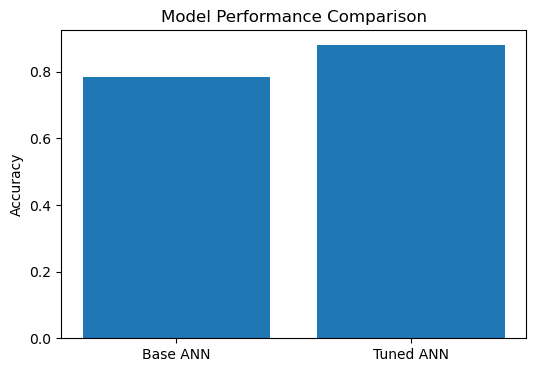

In [18]:
models = ['Base ANN', 'Tuned ANN']
accuracy = [acc ,tuned_acc]   

plt.figure(figsize=(6,4))
plt.bar(models, accuracy)
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()


In [19]:
"""
# Hyperparameter tuning was performed manually by varying the number of neurons, hidden layers, 
  activation functions, and learning rate
# Grid search was considered but not used due to computational complexity and TensorFlow compatibility issues
"""

'\n# Hyperparameter tuning was performed manually by varying the number of neurons, hidden layers, \n  activation functions, and learning rate\n# Grid search was considered but not used due to computational complexity and TensorFlow compatibility issues\n'

Epoch 1/15
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.4375 - loss: 0.9357

/opt/anaconda3/envs/anaconda-2025.04-py3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5570 - loss: 0.7348 - val_accuracy: 0.5294 - val_loss: 0.6388
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7248 - loss: 0.5441 - val_accuracy: 0.9412 - val_loss: 0.4461
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8121 - loss: 0.4328 - val_accuracy: 0.9412 - val_loss: 0.3243
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8255 - loss: 0.3728 - val_accuracy: 1.0000 - val_loss: 0.2866
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8591 - loss: 0.3278 - val_accuracy: 1.0000 - val_loss: 0.2774
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8859 - loss: 0.2965 - val_accuracy: 0.9412 - val_loss: 0.2510
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8859 - loss: 0.2640 - val_accuracy: 0.9412 - val_loss: 0.2518
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9195 - loss: 0.2354 - val_accuracy: 0.9412 - val_loss: 0.2298
Epo

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 32)             │         1,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,972 (15.52 KB)

 Trainable params: 1,985 (7.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,987 (7.77 KB)

MODEL SUMMARY : None


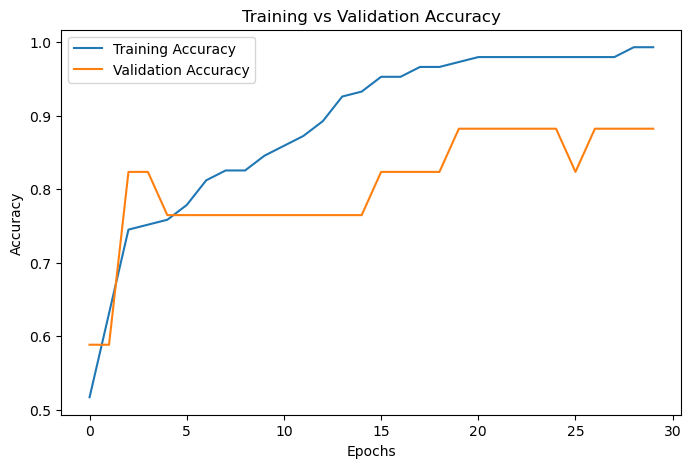

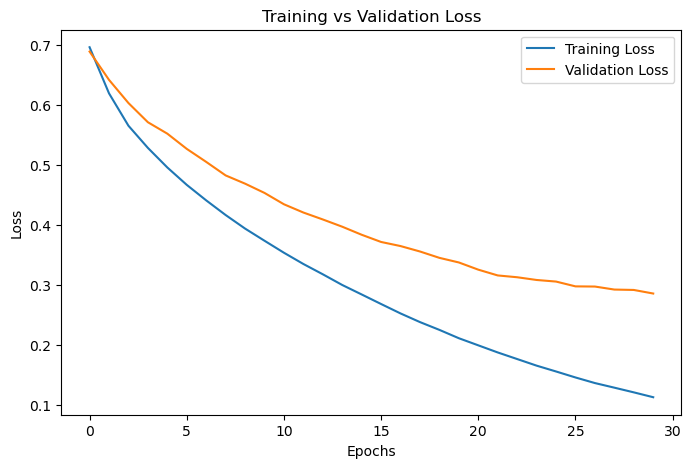

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Base ANN model
model = Sequential()
# Input + Hidden layer
model.add(Dense(32, activation='relu', input_shape=(60,)))
# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(
    optimizer= SGD(learning_rate=0.01,momentum=0.9),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the Model
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predictions
y_pred = (model.predict(x_test) > 0.5).astype(int)

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("MODEL SUMMARY :",model.summary())



# Training vs Validation Accuracy
plt.figure(figsize=(8,5))
plt.plot(tuned_history.history['accuracy'], label='Training Accuracy')
plt.plot(tuned_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# Training vs Validation Loss
plt.figure(figsize=(8,5))
plt.plot(tuned_history.history['loss'], label='Training Loss')
plt.plot(tuned_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [21]:
# The ANN model was evaluated using both Adam and SGD optimizers.
# Although SGD performed well at certain epochs with proper epoch tuning based on validation metrics, 
# Adam converged faster and achieved better accuracy. 
# Hence, Adam was chosen as the optimal optimizer for this task.